# 1. Data Retrieval & Management

## 1.1 Data Lage der Nation

In [1]:
import glob
path = '/content/ldn_txt/*txt'

lage_text = []

for filename in glob.glob(path):
    with open(filename, 'r', errors='ignore', encoding = "utf-8") as file:
        text = file.read()
        lage_text.append(text)

In [2]:
lage_text = ', '.join(lage_text)

In [3]:
lage_text = lage_text.replace('\n', '')

## 1.2 Data Spiegel Online (Webcrawling)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
url = "https://www.faz.de/"

response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

links = soup.find_all("a")

for link in links:
    href = link.get("href")
    if href.startswith("http"):
        print(href)

In [ ]:
links = ["https://www.spiegel.de/schlagzeilen/",
            "https://www.spiegel.de/fuermich/",
            "https://www.spiegel.de/plus/",
            "https://www.spiegel.de/magazine",
            "https://www.spiegel.de/thema/ukraine_konflikt/",
            "https://www.spiegel.de/thema/coronavirus/",
            "https://www.spiegel.de/thema/klimawandel/",
            "https://www.spiegel.de/politik/deutschland/",
            "https://www.spiegel.de/ausland/",
            "https://www.spiegel.de/panorama/",
            "https://www.spiegel.de/sport/",
            "https://www.spiegel.de/wirtschaft/",
            "https://www.spiegel.de/wissenschaft/",
            "https://www.spiegel.de/netzwelt/",
            "https://www.spiegel.de/kultur/",
            "https://www.spiegel.de/thema/leben/",
            "https://www.spiegel.de/karriere/",
            "https://www.spiegel.de/start/",
            "https://www.spiegel.de/geschichte/",
            "https://www.spiegel.de/auto/",
            "https://www.spiegel.de/tests/",
            "https://www.spiegel.de/audio/",
            "https://www.spiegel.de/video/",
            "https://www.spiegel.de/international/"]

soup = []  

for link in links:
    response = requests.get(link)
    soup.append(BeautifulSoup(response.content, "html.parser"))
    

In [ ]:
article_links = []

for site in soup:
  articles = site.find_all("div", {"data-block-el": "articleTeaser"})
  for article in articles:
    try:
      article_links.append(article.find("a")["href"])
    except: 
      print("XX")

article_links

In [ ]:
len(article_links)

In [ ]:
textblocks = []

for link in article_links:
    response = requests.get(link)
    textblocks.append(BeautifulSoup(response.content, "html.parser").find_all(["p"]))

In [ ]:
len(textblocks)

In [ ]:
articleList = []

for article2 in textblocks:   

  text = ""

  for articleBlock in article2:
    text = text + " " + articleBlock.text
  articleList.append(text)

df_spiegel_artikel = pd.DataFrame({"text": articleList})

In [ ]:
df_spiegel_artikel

In [ ]:
df_spiegel_artikel.to_csv('spiegel_artikel.csv', index=False)

In [ ]:
spiegel_text = " ".join(df_spiegel_artikel['text'].astype(str))

In [ ]:
spiegel_text = spiegel_text.replace('\n', '')

In [ ]:
spiegel_text

## 1.3 Data FAZ Online (Webcrawling)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.faz.net/aktuell/"

response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

links = soup.find_all("a")

for link in links:
    href = link.get("href")
    if href.startswith("http"):
        print(href)

In [ ]:
links = ["https://www.faz.net/aktuell/",
         "https://www.faz.net/aktuell/ukraine-konflikt/",
         "https://www.faz.net/aktuell/politik/",
         "https://www.faz.net/aktuell/wirtschaft/",
         "https://www.faz.net/aktuell/finanzen/",
         "https://www.faz.net/aktuell/feuilleton/",
         "https://www.faz.net/aktuell/karriere-hochschule/",
         "https://www.faz.net/aktuell/sport/",
         "https://www.faz.net/aktuell/gesellschaft/",
         "https://www.faz.net/aktuell/stil/",
         "https://www.faz.net/aktuell/rhein-main/",
         "https://www.faz.net/aktuell/technik-motor/",
         "https://www.faz.net/aktuell/wissen/",
         "https://www.faz.net/aktuell/politik/inland/",
         "https://www.faz.net/aktuell/politik/ausland/",
         "https://www.faz.net/aktuell/politik/politische-buecher/",
         "https://www.faz.net/aktuell/politik/geschichte/",
         "https://www.faz.net/aktuell/wirtschaft/historische-hyperinflation/",
         "https://www.faz.net/aktuell/wirtschaft/digitec/",
         "https://www.faz.net/aktuell/wirtschaft/unternehmen/",
         "https://www.faz.net/aktuell/wirtschaft/wohnen/",
         "https://www.faz.net/aktuell/wirtschaft/auto-verkehr/",
         "https://www.faz.net/aktuell/wirtschaft/klima-nachhaltigkeit/",
         "https://www.faz.net/aktuell/wirtschaft/arm-und-reich/",
         "https://www.faz.net/aktuell/wirtschaft/schneller-schlau/",
         "https://www.faz.net/aktuell/wirtschaft/wirtschaftswissen/",
         "https://www.faz.net/aktuell/finanzen/meine-finanzen/",
         "https://www.faz.net/aktuell/finanzen/finanzmarkt/",
         "https://www.faz.net/aktuell/finanzen/boersen-maerkte/",
         "https://www.faz.net/aktuell/feuilleton/debatten/",
         "https://www.faz.net/aktuell/feuilleton/debatten/muslimisch-juedisches-abendbrot/",
         "https://www.faz.net/aktuell/feuilleton/debatten/junge-koepfe/",
         "https://www.faz.net/aktuell/feuilleton/buecher/",
         "https://www.faz.net/aktuell/feuilleton/buecher/comic-kolumne/",
         "https://www.faz.net/aktuell/feuilleton/medien/",
         "https://www.faz.net/aktuell/feuilleton/kino/",
         "https://www.faz.net/aktuell/feuilleton/pop/",
         "https://www.faz.net/aktuell/feuilleton/buehne-und-konzert/",
         "https://www.faz.net/aktuell/feuilleton/kunst-und-architektur/",
         "https://www.faz.net/aktuell/feuilleton/kunstmarkt/",
         "https://www.faz.net/aktuell/feuilleton/familie/",
         "https://www.faz.net/aktuell/karriere-hochschule/buero-co/",
         "https://www.faz.net/aktuell/karriere-hochschule/hoersaal/",
         "https://www.faz.net/aktuell/karriere-hochschule/klassenzimmer/",
         "https://www.faz.net/aktuell/karriere-hochschule/die-karrierefrage/",
         "https://www.faz.net/aktuell/sport/fussball/",
         "https://www.faz.net/aktuell/sport/fussball/bundesliga/",
         "https://www.faz.net/aktuell/sport/fussball/champions-league/",
         "https://www.faz.net/aktuell/sport/formel-1/",
         "https://www.faz.net/aktuell/sport/mehr-sport/",
         "https://www.faz.net/aktuell/sport/wintersport/",
         "https://www.faz.net/aktuell/sport/rhein-main-sport/",
         "https://www.faz.net/aktuell/sport/rhein-main-sport/eintracht-frankfurt/",
         "https://www.faz.net/aktuell/sport/sportpolitik/",
         "https://www.faz.net/aktuell/sport/sport-tipps/",
         "https://www.faz.net/faz-net-services/sport-live-ticker/",
         "https://www.faz.net/aktuell/gesellschaft/menschen/",
         "https://www.faz.net/aktuell/gesellschaft/kriminalitaet/",
         "https://www.faz.net/aktuell/gesellschaft/ungluecke/",
         "https://www.faz.net/aktuell/gesellschaft/gesundheit/",
         "https://www.faz.net/aktuell/gesellschaft/eurovision-song-contest/",
         "https://www.faz.net/aktuell/gesellschaft/tiere/",
         "https://www.faz.net/aktuell/gesellschaft/smalltalk/",
         "https://www.faz.net/aktuell/gesellschaft/jugend-schreibt/",
         "https://www.faz.net/aktuell/stil/mode-design/",
         "https://www.faz.net/aktuell/stil/essen-trinken/",
         "https://www.faz.net/aktuell/stil/leib-seele/",
         "https://www.faz.net/aktuell/stil/trends-nischen/",
         "https://www.faz.net/aktuell/stil/quarterly/",
         "https://www.faz.net/aktuell/rhein-main/frankfurt/",
         "https://www.faz.net/aktuell/rhein-main/frankfurt/ob-wahl-frankfurt-am-main-2023/",
         "https://www.faz.net/aktuell/rhein-main/region-und-hessen/",
         "https://www.faz.net/aktuell/rhein-main/wirtschaft/",
         "https://www.faz.net/aktuell/rhein-main/kultur/",
         "https://www.faz.net/aktuell/technik-motor/motor/",
         "https://www.faz.net/aktuell/technik-motor/elektromobilitaet/",
         "https://www.faz.net/aktuell/technik-motor/technik/",
         "https://www.faz.net/aktuell/technik-motor/digital/",
         "https://www.faz.net/aktuell/technik-motor/energie/",
         "https://www.faz.net/aktuell/wissen/medizin-ernaehrung/",
         "https://www.faz.net/aktuell/wissen/krebsmedizin/",
         "https://www.faz.net/aktuell/wissen/weltraum/",
         "https://www.faz.net/aktuell/wissen/leben-gene/",
         "https://www.faz.net/aktuell/wissen/erde-klima/",
         "https://www.faz.net/aktuell/wissen/physik-mehr/",
         "https://www.faz.net/aktuell/wissen/archaeologie-altertum/",
         "https://www.faz.net/aktuell/wissen/geist-soziales/",
         "https://www.faz.net/aktuell/wissen/forschung-politik/",
         "https://www.faz.net/aktuell/wissen/ab-in-die-botanik/",
         "https://www.faz.net/aktuell/wissen/netzraetsel/",
         ]
         
soup = []  

for link in links:
    response = requests.get(link)
    soup.append(BeautifulSoup(response.content, "html.parser"))  

In [ ]:
article_links = []

for site in soup:
  articles = site.find_all("div", {"class": "o-Grid"})
  for article in articles:
    try:
      article_links.append(article.find("a")["href"])
    except: 
      print("XX")

article_links

In [ ]:
len(article_links)

In [ ]:
textblocks = []

for link in article_links:
  try:
    response = requests.get(link)
    textblocks.append(BeautifulSoup(response.content, "html.parser").find_all(["p"]))
  except (requests.exceptions.RequestException, ValueError):
        print(f"Skipping invalid link: {link}")
        continue

In [ ]:
len(textblocks)

In [ ]:
articleList = []

for article2 in textblocks:
  text = ""
  for articleBlock in article2:
    text = text + " " + articleBlock.text

  articleList.append(text)

df_faz_artikel = pd.DataFrame({"text": articleList})

In [ ]:
df_faz_artikel.head()

In [ ]:
df_faz_artikel.to_csv('faz_artikel.csv', index=False)

In [ ]:
faz_text = " ".join(df_faz_artikel['text'].astype(str))

In [ ]:
faz_text = faz_text.replace('\n', '')

In [ ]:
faz_text

# 2. Finetuning & Modellauswahl

## 2.1 Bert-Multilingual-Modell (Modell 1)

In [ ]:
!pip install datasets transformers
!pip install accelerate

In [ ]:
pip install torch

In [ ]:
from datasets import load_dataset
from transformers import pipeline
from transformers import Trainer, TrainingArguments
from transformers import AutoTokenizer, DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import torch
import pandas as pd

In [ ]:
tweet_dataset = pd.read_csv('train_data_annoted.csv', on_bad_lines= "warn", sep=';')

In [ ]:
tweet_dataset.head()

In [ ]:
tweet_dataset.drop('a', axis=1, inplace=True)
tweet_dataset.drop('b', axis=1, inplace=True)
tweet_dataset.drop('Sentiment', axis=1, inplace=True)
tweet_dataset.drop('Sentiment1', axis=1, inplace=True)
tweet_dataset.drop('Sentiment2', axis=1, inplace=True)
tweet_dataset.drop('id', axis=1, inplace=True)

In [ ]:
tweet_dataset = tweet_dataset.rename(columns={'Embedded_text': 'text', 'majority_sentiment': 'label'})

In [ ]:
tweet_dataset.head()

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(tweet_dataset, test_size=0.2, random_state = 42)

In [ ]:
from datasets import DatasetDict, Dataset

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

dataset_dict = DatasetDict({'train': train_dataset, 'test': test_dataset})

In [ ]:
checkpoint = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
def tokenize_function(sample):
  return tokenizer(sample["text"], truncation=True)

In [ ]:
tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3) 

In [ ]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="macro")
  acc = accuracy_score(labels, preds)
  precision = precision_score(labels, preds, average="macro")
  recall = recall_score(labels, preds, average="macro")
  return {"precision": precision, "recall": recall, "acc": acc, "f1": f1}

In [ ]:
batch_size = 32
logging_steps = len(tokenized_datasets["train"]) // batch_size
training_args = TrainingArguments(output_dir = model_name, 
                                  num_train_epochs = 4,
                                  learning_rate = 3e-5,
                                  per_device_train_batch_size = batch_size,
                                  per_device_eval_batch_size = batch_size,
                                  evaluation_strategy="epoch",
                                  disable_tqdm = False,
                                  logging_steps = logging_steps,
                                  log_level="error")

In [ ]:
trainer = Trainer(
    model = model,
    args = training_args,
    compute_metrics = compute_metrics,
    train_dataset=tokenized_datasets["train"], 
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [ ]:
trainer.train()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
model.save_pretrained('/content/gdrive/My Drive/BERT/bert-multilingu-finetuned-model')
tokenizer.save_pretrained('/content/gdrive/My Drive/BERT/bert-multilingu-finetuned-tokenizer')

### Confusion-Matrix

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

tokens = tokenizer(list(test_df['text']), padding=True, truncation=True, return_tensors='pt')

input_ids = tokens['input_ids'].to(device)
attention_mask = tokens['attention_mask'].to(device)

with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1)

test_df['predicted_label'] = predictions.tolist()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

true_labels = test_df['label']
predicted_labels = test_df['predicted_label']

cm = confusion_matrix(true_labels, predicted_labels)

total = float(sum(sum(cm)))
percentages = [[str(round(value/total*100, 2))+'%' for value in row] for row in cm]

labels = ['0', '1', '2']

sns.heatmap(cm, annot=percentages, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Modell 1")

plt.savefig('confusion_matrix_model_1.png', dpi=300, bbox_inches='tight')
plt.show()

## 2.2 German-Sentiment-Bert-Modell (Modell 2)


In [ ]:
from datasets import load_dataset
from transformers import pipeline
from transformers import Trainer, TrainingArguments
from transformers import AutoTokenizer, DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
checkpoint = "oliverguhr/german-sentiment-bert"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
def tokenize_function(sample):
  return tokenizer(sample["text"], truncation=True)

In [ ]:
tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3)

In [ ]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="macro")
  acc = accuracy_score(labels, preds)
  precision = precision_score(labels, preds, average="macro")
  recall = recall_score(labels, preds, average="macro")
  return {"precision": precision, "recall": recall, "acc": acc, "f1": f1}

In [ ]:
batch_size = 32
logging_steps = len(tokenized_datasets["train"]) // batch_size
training_args = TrainingArguments(output_dir = model_name, 
                                  num_train_epochs = 4,
                                  learning_rate = 3e-5,
                                  per_device_train_batch_size = batch_size,
                                  per_device_eval_batch_size = batch_size,
                                  evaluation_strategy="epoch",
                                  disable_tqdm = False,
                                  logging_steps = logging_steps,
                                  log_level="error")

In [ ]:
trainer = Trainer(
    model = model,
    args = training_args,
    compute_metrics = compute_metrics,
    train_dataset=tokenized_datasets["train"], 
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [ ]:
trainer.train()

In [ ]:
model.save_pretrained('/content/gdrive/My Drive/BERT/german_sentiment-finetuned-model')
tokenizer.save_pretrained('/content/gdrive/My Drive/BERT/german_sentiment-finetuned-tokenizer')

### Confusion-Matrix

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

tokens = tokenizer(list(test_df['text']), padding=True, truncation=True, return_tensors='pt')

input_ids = tokens['input_ids'].to(device)
attention_mask = tokens['attention_mask'].to(device)

with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1)

test_df['predicted_label'] = predictions.tolist()

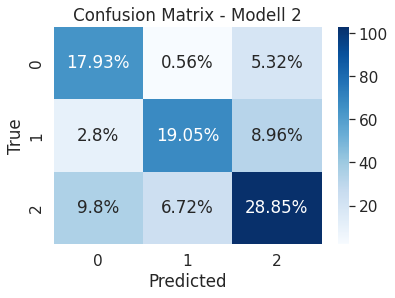

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

true_labels = test_df['label']
predicted_labels = test_df['predicted_label']

cm = confusion_matrix(true_labels, predicted_labels)

total = float(sum(sum(cm)))
percentages = [[str(round(value/total*100, 2))+'%' for value in row] for row in cm]

labels = ['0', '1', '2']

sns.heatmap(cm, annot=percentages, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Modell 2")

plt.savefig('confusion_matrix_model_2.png', dpi=300, bbox_inches='tight')
plt.show()

## 2.3 Twitter-RoBERTa-Modell (Modell 3)

In [ ]:
from datasets import load_dataset
from transformers import pipeline
from transformers import Trainer, TrainingArguments
from transformers import AutoTokenizer, DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
checkpoint = "citizenlab/twitter-xlm-roberta-base-sentiment-finetunned"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [ ]:
def tokenize_function(sample):
  return tokenizer(sample["text"], truncation=True)

In [ ]:
tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3) 

In [ ]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="macro")
  acc = accuracy_score(labels, preds)
  precision = precision_score(labels, preds, average="macro")
  recall = recall_score(labels, preds, average="macro")
  return {"precision": precision, "recall": recall, "acc": acc, "f1": f1}

In [ ]:
batch_size = 32
logging_steps = len(tokenized_datasets["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-tweet"
training_args = TrainingArguments(output_dir = model_name, 
                                  num_train_epochs = 4,
                                  learning_rate = 2e-5, 
                                  per_device_train_batch_size = batch_size,
                                  per_device_eval_batch_size = batch_size,
                                  evaluation_strategy="epoch", 
                                  disable_tqdm = False,
                                  logging_steps = logging_steps,
                                  log_level="error")

In [ ]:
trainer = Trainer(
    model = model,
    args = training_args,
    compute_metrics = compute_metrics,
    train_dataset=tokenized_datasets["train"], 
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [ ]:
trainer.train()

In [ ]:
model.save_pretrained('/content/gdrive/My Drive/BERT/twitter_roberta-finetuned-model')
tokenizer.save_pretrained('/content/gdrive/My Drive/BERT/twitter_roberta-finetuned-tokenizer')

### Confusion-Matrix

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

tokens = tokenizer(list(test_df['text']), padding=True, truncation=True, return_tensors='pt')

input_ids = tokens['input_ids'].to(device)
attention_mask = tokens['attention_mask'].to(device)

with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1)

test_df['predicted_label'] = predictions.tolist()

test_df.to_csv('classified_lage.csv', index=False)


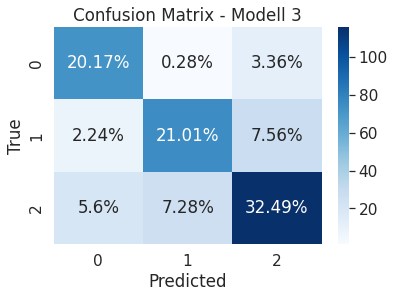

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

true_labels = test_df['label']
predicted_labels = test_df['predicted_label']

cm = confusion_matrix(true_labels, predicted_labels)

total = float(sum(sum(cm)))
percentages = [[str(round(value/total*100, 2))+'%' for value in row] for row in cm]

labels = ['0', '1', '2']

sns.heatmap(cm, annot=percentages, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Modell 3")

plt.savefig('confusion_matrix_model_3.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Rule-Based Named-Entity-Recognition

## 3.1 RBNER - Lage der Nation


In [ ]:
import pandas as pd
import spacy
from spacy.matcher import Matcher, PhraseMatcher
from spacy.pipeline import EntityRuler
from spacy import displacy
from spacy.lang.de import German
from spacy.lang.en import English

In [ ]:
import os
os.environ['LC_ALL'] = 'en_US.UTF-8'
os.environ['LANG'] = 'en_US.UTF-8'

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!python -m spacy download de_core_news_sm

In [ ]:
len(lage_text)

In [ ]:
nlp_german = spacy.load("de_core_news_sm", exclude="ner") 
nlp_german = German()
nlp_german.max_length = 7061119
nlp_german.add_pipe('sentencizer')

In [ ]:
german_ruler = nlp_german.add_pipe("entity_ruler", config={"validate":True})

In [ ]:
with open('parteien.txt', 'r', encoding='utf-8') as file:
    parteien = file.read()
    
parteien_list = parteien.split("\n")

parteien_list

In [ ]:
with open('politiker_innen.txt', 'r', encoding='utf-8') as file:
    politiker_innen = file.read()
    
politiker_innen_list = politiker_innen.split("\n")    

politiker_innen_list

In [ ]:
with open('regierungen.txt', 'r', encoding='utf-8') as file:
    regierungen = file.read()
    
regierungen_list = regierungen.split("\n")    

regierungen_list

In [ ]:
parteien_patterns = [
    {"label": "PARTEI", "pattern": str(partei)} for partei in list(nlp_german.pipe(parteien_list))
]
politiker_innen_patterns = [
    {"label": "POLITIKER_IN", "pattern": str(politiker_in)} for politiker_in in list(nlp_german.pipe(politiker_innen_list))
]
regierungen_patterns = [
    {"label": "REGIERUNG", "pattern": str(regierung)} for regierung in list(nlp_german.pipe(regierungen_list))
]
patterns = parteien_patterns + politiker_innen_patterns + regierungen_patterns
patterns

In [ ]:
german_ruler.add_patterns(patterns)

In [ ]:
lage_text_processed = nlp_german(lage_text)

In [ ]:
len(lage_text_processed)

In [ ]:
entities = [entity.text for entity in lage_text_processed.ents]

sentences = []
sents_list = list(lage_text_processed.sents)
for i, sent in enumerate(sents_list):
    if any(ent in sent.text.strip() for ent in entities):
        sentences.append(sent.text.strip())

df_lage_text = pd.DataFrame(columns=["Sentence", "Entity"])

for sentence in sentences:
    for entity in entities:
        if entity in sentence:
            df_lage_text = df_lage_text.append({"Sentence": sentence, "Entity": entity}, ignore_index=True)

print(df_lage_text)

In [ ]:
len(df_lage_text)

In [ ]:
df_lage_text = df_lage_text.drop_duplicates()

In [ ]:
df_lage_text

In [ ]:
df_lage_text.to_csv('df_lage_texte.csv', index=False)

## 3.2 RBNER - Spiegel Online

In [ ]:
len(spiegel_text)

In [ ]:
nlp_german = spacy.load("de_core_news_sm", exclude="ner") 
nlp_german = German()
nlp_german.max_length = 5670482
nlp_german.add_pipe('sentencizer')

In [ ]:
german_ruler = nlp_german.add_pipe("entity_ruler", config={"validate":True})

In [ ]:
german_ruler.add_patterns(patterns)

In [ ]:
spiegel_text_processed = nlp_german(spiegel_text)

In [ ]:
entities = [entity.text for entity in spiegel_text_processed.ents]

sentences = []
sents_list = list(spiegel_text_processed.sents)
for i, sent in enumerate(sents_list):
    if any(ent in sent.text.strip() for ent in entities):
        sentences.append(sent.text.strip())

df_spiegel_text = pd.DataFrame(columns=["Sentence", "Entity"])

for sentence in sentences:
    for entity in entities:
        if entity in sentence:
            df_spiegel_text = df_spiegel_text.append({"Sentence": sentence, "Entity": entity}, ignore_index=True)

print(df_spiegel_text)

In [ ]:
len(df_spiegel_text)

In [ ]:
df_spiegel_text = df_spiegel_text.drop_duplicates()

In [ ]:
df_spiegel_text

In [ ]:
df_spiegel_text.to_csv('df_spiegel_texte.csv', index=False)

## 3.3 RBNER - FAZ Online

In [ ]:
len(faz_text)

In [ ]:
nlp_german = spacy.load("de_core_news_sm", exclude="ner") 
nlp_german = German()
nlp_german.max_length = 7287258
nlp_german.add_pipe('sentencizer')

In [ ]:
german_ruler = nlp_german.add_pipe("entity_ruler", config={"validate":True})

In [ ]:
german_ruler.add_patterns(patterns)

In [ ]:
faz_text_processed = nlp_german(faz_text)

In [ ]:
entities = [entity.text for entity in faz_text_processed.ents]

sentences = []
sents_list = list(faz_text_processed.sents)
for i, sent in enumerate(sents_list):
    if any(ent in sent.text.strip() for ent in entities):
        sentences.append(sent.text.strip())
        
df_faz_text = pd.DataFrame(columns=["Sentence", "Entity"])

for sentence in sentences:
    for entity in entities:
        if entity in sentence:
            df_faz_text = df_faz_text.append({"Sentence": sentence, "Entity": entity}, ignore_index=True)

print(df_faz_text)

In [ ]:
len(df_faz_text)

In [ ]:
df_faz_text = df_faz_text.drop_duplicates()

In [ ]:
df_faz_text

In [ ]:
df_faz_text.to_csv('df_faz_texte.csv', index=False)

# 4. Sentiment Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install transformers
!pip install datasets transformers
!pip install accelerate
!pip install torch

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer

model = BertForSequenceClassification.from_pretrained('/content/gdrive/MyDrive/BERT/bert-multilingu-finetuned-model')
tokenizer = BertTokenizer.from_pretrained('/content/gdrive/MyDrive/BERT/bert-multilingu-finetuned-tokenizer')

## 4.1 Sentiment Analysis Lage der Nation

In [ ]:
import pandas as pd
import torch

In [ ]:
df_lage_text = pd.read_csv('df_lage_texte.csv')

In [ ]:
tokens = tokenizer(list(df_lage_text['Sentence']), padding=True, truncation=True, return_tensors='pt')
input_ids = tokens['input_ids']
attention_mask = tokens['attention_mask']

with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1)

df_lage_text['predicted_label'] = predictions.tolist()

df_lage_text.to_csv('classified_lage.csv', index=False)

In [ ]:
df_class_lage = pd.read_csv('classified_lage.csv')

In [ ]:
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Regierung']
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Opposition']
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Regierungsparteien']
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Oppositionsparteien']
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Koalition']
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Koalitionsparteien']
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Ampelkoalition']
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Koalition']
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Ampelparteien']
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Ampelregierung']
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Ampel']
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Regierungskoalition']
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Schwarz-Gelb']
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Schwarz-Grün']
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Groko']
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Große Koalition']
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Jamaika']
df_class_lage = df_class_lage[df_class_lage['Entity'] != 'Kenia']

In [ ]:
df_class_lage

In [ ]:
df_class_lage.replace({"Entity": {"Sozialdemokraten": "SPD", "Sozialdemokratinnen": "SPD", "Sozialdemokratinnen": "SPD", "Genossen": "SPD",
                                  "Genossinnen": "SPD", "SPD-Bundestagsfraktion": "SPD", "SPD-Fraktion im Bundestag": "SPD", "SPD-Fraktion": "SPD",
                                  "Olaf Scholz": "SPD", "Saskia Esken": "SPD", "Lars Klingbeil": "SPD", "Franziska Giffey": "SPD", "Dietmar Woidke": "SPD",
                                  "Andreas Bovenschulte": "SPD", "Peter Tschentscher": "SPD", "Manuela Schwesig": "SPD", "Stephan Weil": "SPD", "Malu Dreyer": "SPD",
                                  "Anke Rehlinger": "SPD", "Nancy Faeser": "SPD", "Hubertus Heil": "SPD", "Christine Lambrecht": "SPD", "Karl Lauterbach": "SPD",
                                  "Svenja Schulze": "SPD", "Klara Geywitz": "SPD", "Wolfgang Schmidt": "SPD", "Kevin Kühnert": "SPD", "Bärbel Bas": "SPD",
                                  "Aydan Özoğuz": "SPD", "Frank-Walter Steinmeier": "SPD", "Rolf Mützenich": "SPD"}}, inplace=True)

df_class_lage.replace({"Entity": {"Bündnis 90/Die Grünen": "Grüne", "Die Grünen": "Grüne", "Bundestagsfraktion Bündnis 90/Die Grünen": "Grüne", "Grünenfraktion": "Grüne", "Ricarda Lang": "Grüne",
                                  "Omid Nouripour": "Grüne", "Winfried Kretschmann": "Grüne", "Annalena Bärbock": "Grüne", "Robert Habeck": "Grüne",
                                  "Cem Özdemir": "Grüne", "Lisa Paus": "Grüne", "Steffi Lemke": "Grüne", "Emily May Büning": "Grüne",
                                  "Katrin Göring-Eckardt": "Grüne", "Katharina Dröge": "Grüne", "Britta Haßelmann": "Grüne"}}, inplace=True)

df_class_lage.replace({"Entity": {"Liberale": "FDP", "Die Liberalen": "FDP", "Freie Demokraten": "FDP", "Fraktion der Freien Demokraten": "FDP", "FDP-Bundestagsfraktion": "FDP",
                                  "FDP-Fraktion": "FDP", "Christian Lindner": "FDP", "Marco Buschmann": "FDP", "Volker Wissing": "FDP",
                                  "Bettina Stark-Watzinger": "FDP", "Bijan Djir-Sarai": "FDP", "Wolfgang Kubicki": "FDP", "Christian Dürr": "FDP"}}, inplace=True)

df_class_lage.replace({"Entity": {"CDU": "UNION", "CSU": "UNION", "CDU/CSU": "UNION", "Union": "UNION", "Konservative": "UNION",
                                  "Schwersterparteien": "UNION", "CDU/CSU-Fraktion im Deutschen Bundestag": "UNION", "CDU/CSU-Bundestagsfraktion": "UNION", "Unionsfraktion": "UNION",
                                  "CDU/CSU-Fraktion": "UNION", "Friedrich Merz": "UNION", "Markus Söder": "UNION", "Hendirk Wüst": "UNION",
                                  "Michael Kretschmer": "UNION", "Rainer Haseloff": "UNION", "Daniel Günther": "UNION", "Yvonne Magwas": "UNION", "Martin Huber": "UNION", "Mario Czaja": "UNION"}}, inplace=True)

df_class_lage.replace({"Entity": {"Die Linke": "LINKE", "Linkspartei": "LINKE", "Die Linken": "LINKE", "Fraktion Die Linke im Bundestag": "LINKE", "Linksfraktion": "LINKE",
                                  "Fraktion Die Linke": "LINKE", "Janine Wissler": "LINKE", "Martin Schirdewan": "LINKE", "Bodo Ramelow": "LINKE",
                                  "Petra Pau": "LINKE", "Dietmar Bartsch": "LINKE", "Amira Mohamed Ali": "LINKE"}}, inplace=True)

df_class_lage.replace({"Entity": {"AfD": "AFD", "Alternative für Deutschland": "AFD", "AfD-Fraktion im Bundestag": "AFD", "AfD-Bundestagsfraktion": "AFD", "AfD-Fraktion": "AFD",
                                  "Tino Chrupalla": "AFD", "Alice Weidel": "AFD"}}, inplace=True)



In [ ]:
#auszählen Sentiments im Allgemeinen
freq_senti_gen = df_class_lage.groupby('predicted_label').size()
df_freq_senti_gen  = pd.DataFrame(freq_senti_gen )

df_freq_senti_gen = df_freq_senti_gen.rename(columns={0: "freq"})

df_freq_senti_gen

In [ ]:
#auszählen Sentiments nach Entities
freq_senti_enti = df_class_lage.groupby('Entity')['predicted_label'].value_counts()
df_freq_senti_enti = pd.DataFrame(freq_senti_enti)
df_freq_senti_enti

freq_senti_enti.to_csv('df_freq_senti_enti_lage.csv', index=False)

In [ ]:
df_freq_senti_enti

## 4.2 Sentiment Analysis Spiegel Online

In [ ]:
import pandas as pd
import torch

In [ ]:
df_spiegel_text = pd.read_csv('df_spiegel_texte.csv')

In [ ]:
df_spiegel_text.head()

In [ ]:
tokens = tokenizer(list(df_spiegel_text['Sentence']), padding=True, truncation=True, return_tensors='pt')
input_ids = tokens['input_ids']
attention_mask = tokens['attention_mask']

with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1)

df_spiegel_text['predicted_label'] = predictions.tolist()

df_spiegel_text.to_csv('classified_spiegel.csv', index=False)

In [ ]:
df_spiegel_text

In [ ]:
df_class_spiegel = pd.read_csv('classified_spiegel.csv')

In [ ]:
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Regierung']
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Opposition']
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Regierungsparteien']
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Oppositionsparteien']
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Koalition']
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Koalitionsparteien']
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Ampelkoalition']
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Koalition']
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Ampelparteien']
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Ampelregierung']
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Ampel']
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Regierungskoalition']
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Schwarz-Gelb']
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Schwarz-Grün']
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Groko']
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Große Koalition']
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Jamaika']
df_class_spiegel = df_class_spiegel[df_class_spiegel['Entity'] != 'Kenia']

In [ ]:
df_class_spiegel.replace({"Entity": {"Sozialdemokraten": "SPD", "Sozialdemokratinnen": "SPD", "Sozialdemokratinnen": "SPD", "Genossen": "SPD",
                                  "Genossinnen": "SPD", "SPD-Bundestagsfraktion": "SPD", "SPD-Fraktion im Bundestag": "SPD", "SPD-Fraktion": "SPD",
                                  "Olaf Scholz": "SPD", "Saskia Esken": "SPD", "Lars Klingbeil": "SPD", "Franziska Giffey": "SPD", "Dietmar Woidke": "SPD",
                                  "Andreas Bovenschulte": "SPD", "Peter Tschentscher": "SPD", "Manuela Schwesig": "SPD", "Stephan Weil": "SPD", "Malu Dreyer": "SPD",
                                  "Anke Rehlinger": "SPD", "Nancy Faeser": "SPD", "Hubertus Heil": "SPD", "Christine Lambrecht": "SPD", "Karl Lauterbach": "SPD",
                                  "Svenja Schulze": "SPD", "Klara Geywitz": "SPD", "Wolfgang Schmidt": "SPD", "Kevin Kühnert": "SPD", "Bärbel Bas": "SPD",
                                  "Aydan Özoğuz": "SPD", "Frank-Walter Steinmeier": "SPD", "Rolf Mützenich": "SPD"}}, inplace=True)

df_class_spiegel.replace({"Entity": {"Bündnis 90/Die Grünen": "Grüne", "Die Grünen": "Grüne", "Bundestagsfraktion Bündnis 90/Die Grünen": "Grüne", "Grünenfraktion": "Grüne", "Ricarda Lang": "Grüne",
                                  "Omid Nouripour": "Grüne", "Winfried Kretschmann": "Grüne", "Annalena Bärbock": "Grüne", "Robert Habeck": "Grüne",
                                  "Cem Özdemir": "Grüne", "Lisa Paus": "Grüne", "Steffi Lemke": "Grüne", "Emily May Büning": "Grüne",
                                  "Katrin Göring-Eckardt": "Grüne", "Katharina Dröge": "Grüne", "Britta Haßelmann": "Grüne"}}, inplace=True)

df_class_spiegel.replace({"Entity": {"Liberale": "FDP", "Die Liberalen": "FDP", "Freie Demokraten": "FDP", "Fraktion der Freien Demokraten": "FDP", "FDP-Bundestagsfraktion": "FDP",
                                  "FDP-Fraktion": "FDP", "Christian Lindner": "FDP", "Marco Buschmann": "FDP", "Volker Wissing": "FDP",
                                  "Bettina Stark-Watzinger": "FDP", "Bijan Djir-Sarai": "FDP", "Wolfgang Kubicki": "FDP", "Christian Dürr": "FDP"}}, inplace=True)

df_class_spiegel.replace({"Entity": {"CDU": "UNION", "CSU": "UNION", "CDU/CSU": "UNION", "Union": "UNION", "Konservative": "UNION",
                                  "Schwersterparteien": "UNION", "CDU/CSU-Fraktion im Deutschen Bundestag": "UNION", "CDU/CSU-Bundestagsfraktion": "UNION", "Unionsfraktion": "UNION",
                                  "CDU/CSU-Fraktion": "UNION", "Friedrich Merz": "UNION", "Markus Söder": "UNION", "Hendirk Wüst": "UNION",
                                  "Michael Kretschmer": "UNION", "Rainer Haseloff": "UNION", "Daniel Günther": "UNION", "Yvonne Magwas": "UNION", "Martin Huber": "UNION", "Mario Czaja": "UNION"}}, inplace=True)

df_class_spiegel.replace({"Entity": {"Die Linke": "LINKE", "Linkspartei": "LINKE", "Die Linken": "LINKE", "Fraktion Die Linke im Bundestag": "LINKE", "Linksfraktion": "LINKE",
                                  "Fraktion Die Linke": "LINKE", "Janine Wissler": "LINKE", "Martin Schirdewan": "LINKE", "Bodo Ramelow": "LINKE",
                                  "Petra Pau": "LINKE", "Dietmar Bartsch": "LINKE", "Amira Mohamed Ali": "LINKE"}}, inplace=True)

df_class_spiegel.replace({"Entity": {"AfD": "AFD", "Alternative für Deutschland": "AFD", "AfD-Fraktion im Bundestag": "AFD", "AfD-Bundestagsfraktion": "AFD", "AfD-Fraktion": "AFD",
                                  "Tino Chrupalla": "AFD", "Alice Weidel": "AFD"}}, inplace=True)



In [ ]:
#auszählen Sentiments im Allgemeinen
freq_senti_gen = df_class_spiegel.groupby('predicted_label').size()
df_freq_senti_gen  = pd.DataFrame(freq_senti_gen )

df_freq_senti_gen

In [ ]:
#auszählen Sentiments nach Entities
freq_senti_enti = df_class_spiegel.groupby('Entity')['predicted_label'].value_counts()
df_freq_senti_enti = pd.DataFrame(freq_senti_enti)

df_freq_senti_enti

## 4.3 Sentiment Analysis FAZ Online

In [ ]:
import pandas as pd
import torch

In [ ]:
df_faz_text = pd.read_csv('df_faz_texte.csv')

In [ ]:
tokens = tokenizer(list(df_faz_text['Sentence']), padding=True, truncation=True, return_tensors='pt')
input_ids = tokens['input_ids']
attention_mask = tokens['attention_mask']

with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1)

df_faz_text['predicted_label'] = predictions.tolist()

df_faz_text.to_csv('classified_faz.csv', index=False)

In [ ]:
df_class_faz = pd.read_csv('classified_faz.csv')

In [ ]:
df_class_faz

,Sentence,Entity,predicted_label
0,"Bundesinnenministerin Nancy Faeser (SPD), die ...",Nancy Faeser,2
1,"Bundesinnenministerin Nancy Faeser (SPD), die ...",SPD,2
2,Die Regierung in Tunis wies diese Äußerungen e...,Regierung,1
3,Doch die Regierung ist bei der Erfüllung ihrer...,Regierung,1
4,Justizreform : ...,Regierung,1
...,...,...,...
752,Christian Drosten ruft das Ende der Pandemie a...,Marco Buschmann,1
753,Bundesbildungsministerin Stark-Watzinger hat e...,Regierung,2
754,Grünen-Politikerin Brantner wurde in Taiwan em...,Grüne,2
755,Die amerikanische Regierung muss nun noch mehr...,Regierung,2


In [ ]:
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Regierung']
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Opposition']
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Regierungsparteien']
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Oppositionsparteien']
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Koalition']
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Koalitionsparteien']
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Ampelkoalition']
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Koalition']
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Ampelparteien']
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Ampelregierung']
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Ampel']
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Regierungskoalition']
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Schwarz-Gelb']
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Schwarz-Grün']
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Groko']
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Große Koalition']
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Jamaika']
df_class_faz = df_class_faz[df_class_faz['Entity'] != 'Kenia']

In [ ]:
df_class_faz.replace({"Entity": {"Sozialdemokraten": "SPD", "Sozialdemokratinnen": "SPD", "Sozialdemokratinnen": "SPD", "Genossen": "SPD",
                                  "Genossinnen": "SPD", "SPD-Bundestagsfraktion": "SPD", "SPD-Fraktion im Bundestag": "SPD", "SPD-Fraktion": "SPD",
                                  "Olaf Scholz": "SPD", "Saskia Esken": "SPD", "Lars Klingbeil": "SPD", "Franziska Giffey": "SPD", "Dietmar Woidke": "SPD",
                                  "Andreas Bovenschulte": "SPD", "Peter Tschentscher": "SPD", "Manuela Schwesig": "SPD", "Stephan Weil": "SPD", "Malu Dreyer": "SPD",
                                  "Anke Rehlinger": "SPD", "Nancy Faeser": "SPD", "Hubertus Heil": "SPD", "Christine Lambrecht": "SPD", "Karl Lauterbach": "SPD",
                                  "Svenja Schulze": "SPD", "Klara Geywitz": "SPD", "Wolfgang Schmidt": "SPD", "Kevin Kühnert": "SPD", "Bärbel Bas": "SPD",
                                  "Aydan Özoğuz": "SPD", "Frank-Walter Steinmeier": "SPD", "Rolf Mützenich": "SPD"}}, inplace=True)

df_class_faz.replace({"Entity": {"Bündnis 90/Die Grünen": "Grüne", "Die Grünen": "Grüne", "Bundestagsfraktion Bündnis 90/Die Grünen": "Grüne", "Grünenfraktion": "Grüne", "Ricarda Lang": "Grüne",
                                  "Omid Nouripour": "Grüne", "Winfried Kretschmann": "Grüne", "Annalena Bärbock": "Grüne", "Robert Habeck": "Grüne",
                                  "Cem Özdemir": "Grüne", "Lisa Paus": "Grüne", "Steffi Lemke": "Grüne", "Emily May Büning": "Grüne",
                                  "Katrin Göring-Eckardt": "Grüne", "Katharina Dröge": "Grüne", "Britta Haßelmann": "Grüne"}}, inplace=True)

df_class_faz.replace({"Entity": {"Liberale": "FDP", "Die Liberalen": "FDP", "Freie Demokraten": "FDP", "Fraktion der Freien Demokraten": "FDP", "FDP-Bundestagsfraktion": "FDP",
                                  "FDP-Fraktion": "FDP", "Christian Lindner": "FDP", "Marco Buschmann": "FDP", "Volker Wissing": "FDP",
                                  "Bettina Stark-Watzinger": "FDP", "Bijan Djir-Sarai": "FDP", "Wolfgang Kubicki": "FDP", "Christian Dürr": "FDP"}}, inplace=True)

df_class_faz.replace({"Entity": {"CDU": "UNION", "CSU": "UNION", "CDU/CSU": "UNION", "Union": "UNION", "Konservative": "UNION",
                                  "Schwersterparteien": "UNION", "CDU/CSU-Fraktion im Deutschen Bundestag": "UNION", "CDU/CSU-Bundestagsfraktion": "UNION", "Unionsfraktion": "UNION",
                                  "CDU/CSU-Fraktion": "UNION", "Friedrich Merz": "UNION", "Markus Söder": "UNION", "Hendirk Wüst": "UNION",
                                  "Michael Kretschmer": "UNION", "Rainer Haseloff": "UNION", "Daniel Günther": "UNION", "Yvonne Magwas": "UNION", "Martin Huber": "UNION", "Mario Czaja": "UNION"}}, inplace=True)

df_class_faz.replace({"Entity": {"Die Linke": "LINKE", "Linkspartei": "LINKE", "Die Linken": "LINKE", "Fraktion Die Linke im Bundestag": "LINKE", "Linksfraktion": "LINKE",
                                  "Fraktion Die Linke": "LINKE", "Janine Wissler": "LINKE", "Martin Schirdewan": "LINKE", "Bodo Ramelow": "LINKE",
                                  "Petra Pau": "LINKE", "Dietmar Bartsch": "LINKE", "Amira Mohamed Ali": "LINKE"}}, inplace=True)

df_class_faz.replace({"Entity": {"AfD": "AFD", "Alternative für Deutschland": "AFD", "AfD-Fraktion im Bundestag": "AFD", "AfD-Bundestagsfraktion": "AFD", "AfD-Fraktion": "AFD",
                                  "Tino Chrupalla": "AFD", "Alice Weidel": "AFD"}}, inplace=True)



In [ ]:
freq_senti_gen = df_class_faz.groupby('predicted_label').size()
df_freq_senti_gen  = pd.DataFrame(freq_senti_gen )

df_freq_senti_gen

In [ ]:
freq_senti_enti = df_class_faz.groupby('Entity')['predicted_label'].value_counts()
df_freq_senti_enti = pd.DataFrame(freq_senti_enti)

df_freq_senti_enti